# Import Libraries

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [3]:

data=pd.read_csv('heart.csv')


# Data Size

In [4]:
data.shape

(918, 12)

In [5]:
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Missing Values

In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Statistical Overview

In [8]:
data.describe(include = "object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [9]:
data.describe(include = "int64")

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000


In [10]:
data.describe(include = "float64")

,Oldpeak
count,918.000000
mean,0.887364
std,1.066570
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


# Duplicate Data

In [11]:
data.duplicated().sum()

np.int64(0)

# Values Count


In [12]:
val = []
val = []
for column in ['Sex','ChestPainType','HeartDisease','FastingBS','RestingECG'
,'ExerciseAngina',]:
    print('==============================')
    print(f"{column} : {data[column].value_counts()}")
    val.append(column)

Sex : Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType : ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
HeartDisease : HeartDisease
1    508
0    410
Name: count, dtype: int64
FastingBS : FastingBS
0    704
1    214
Name: count, dtype: int64
RestingECG : RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina : ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


# Unique Values

In [13]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

In [18]:
data['Cholesterol']= data['Cholesterol'].replace(0,np.nan)

In [19]:
median_value = data['Cholesterol'].median ()
data['Cholesterol'].fillna(median_value, inplace=True)

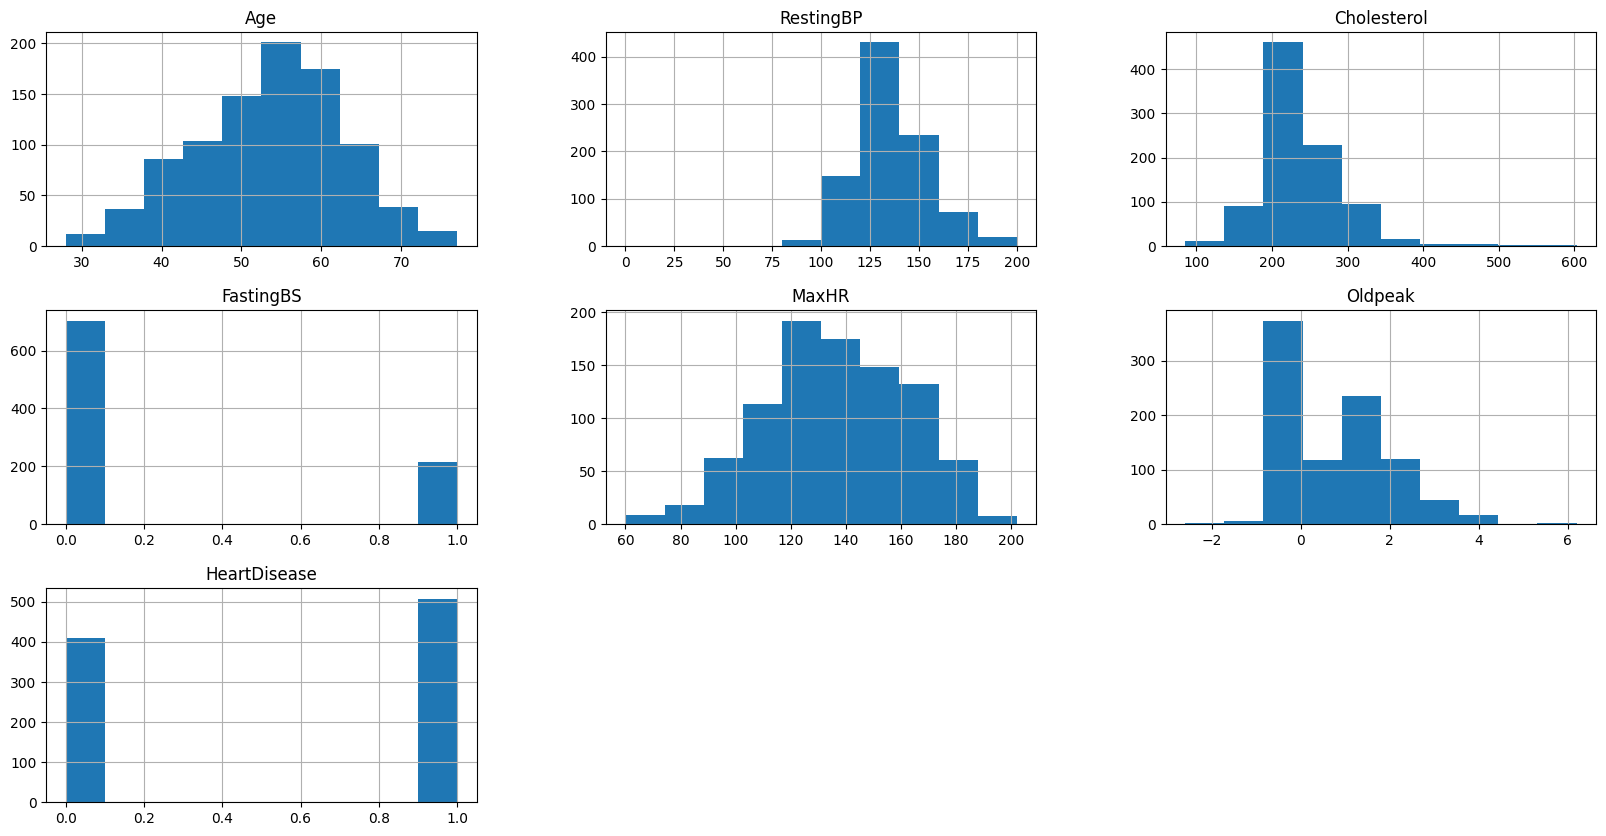

In [20]:
data.hist(figsize=(20,10))
plt.show()

# Check the correlation between the features

In [21]:
data.corr()

ValueError: could not convert string to float: 'M'

In [22]:
data.groupby("Sex")["HeartDisease"].mean()


Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

In [23]:
data.groupby("Sex")["HeartDisease"].min()

Sex
F    0
M    0
Name: HeartDisease, dtype: int64

In [24]:
data.groupby("Sex")["HeartDisease"].max()

Sex
F    1
M    1
Name: HeartDisease, dtype: int64

In [25]:
data.groupby("Sex")["HeartDisease"].sum()

Sex
F     50
M    458
Name: HeartDisease, dtype: int64

In [26]:
data.groupby("Sex")["Age"].min()

Sex
F    30
M    28
Name: Age, dtype: int64

In [27]:
data.groupby(["ChestPainType","Sex"])["HeartDisease"].agg(["sum" , "mean" , "min" , "max"])

sum      mean  min  max
ChestPainType Sex                         
ASY           F     39  0.557143    0    1
              M    353  0.828638    0    1
ATA           F      4  0.066667    0    1
              M     20  0.176991    0    1
NAP           F      6  0.113208    0    1
              M     66  0.440000    0    1
TA            F      1  0.100000    0    1
              M     19  0.527778    0    1

# Data Visualization

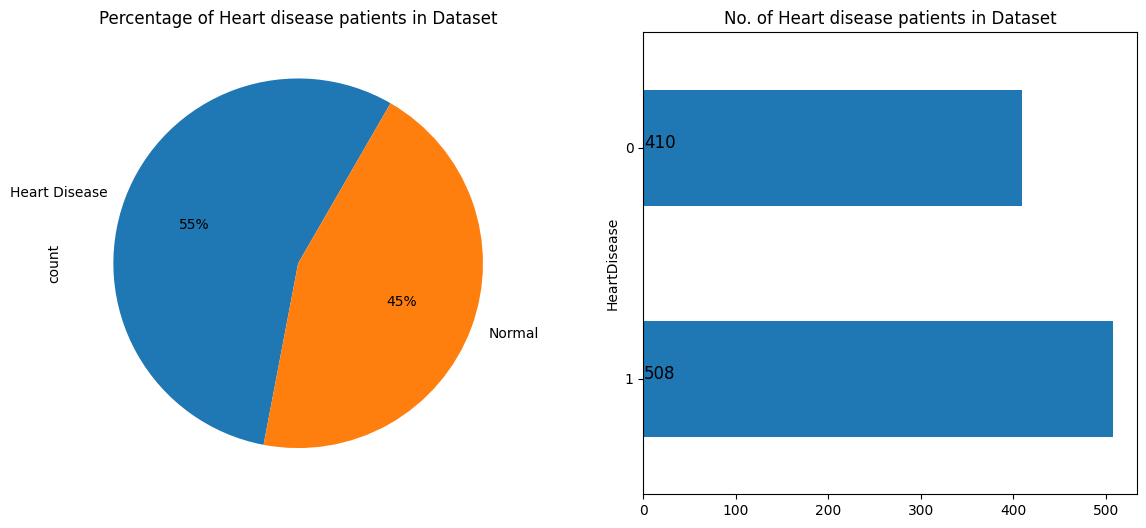

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = data ['HeartDisease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data ["HeartDisease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data["HeartDisease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

In [29]:
data["ChestPainType"].nunique()

4

In [30]:
print(data.ChestPainType.value_counts())
plt.figure(figsize=(5,5))

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

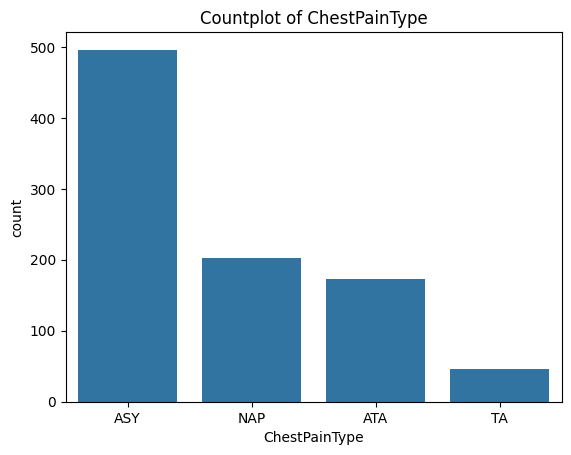

In [31]:
sns.countplot(data=data, x="ChestPainType", order=data["ChestPainType"].value_counts().index)
plt.xticks(rotation=360)
plt.title("Countplot of ChestPainType")
plt.show()

<Axes: xlabel='RestingECG', ylabel='Cholesterol'>

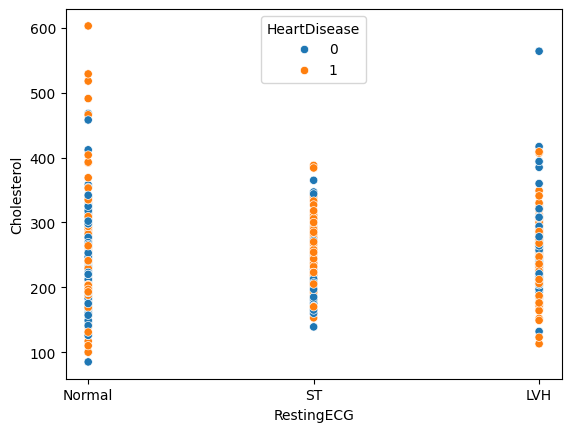

In [32]:
sns.scatterplot(x = 'RestingECG', y = 'Cholesterol', hue = 'HeartDisease', data = data)

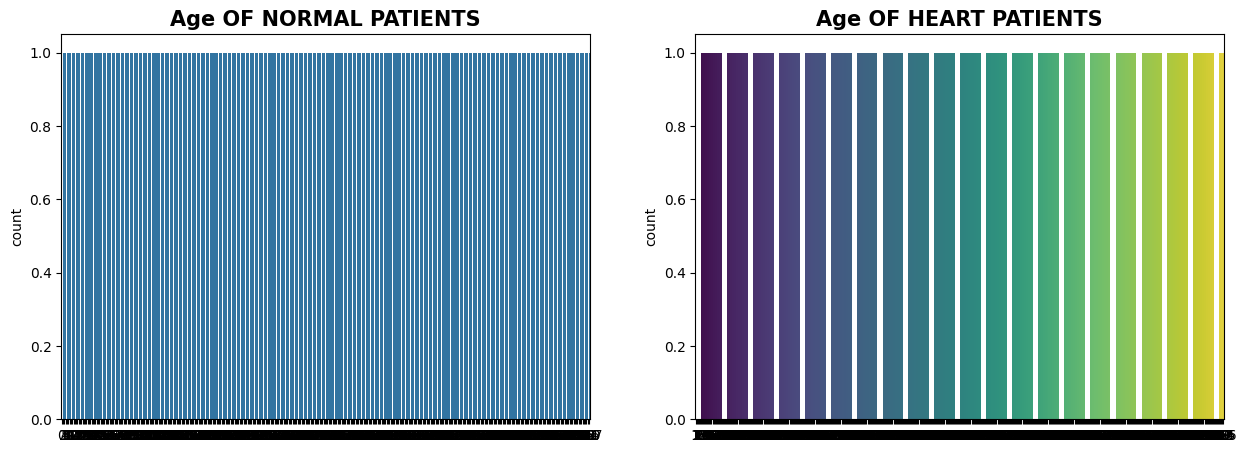

In [33]:
attr_1=data[data['HeartDisease']==1]

attr_0=data[data['HeartDisease']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Age'])
plt.title('Age OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Age'], palette='viridis')
plt.title('Age OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

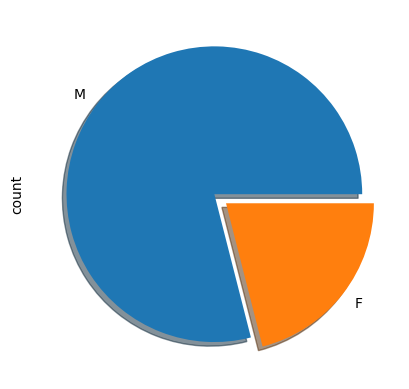

In [34]:
myexplode = [0,0.1]
data["Sex"].value_counts().plot(kind="pie", explode =myexplode , shadow = True )
plt.show() 

In [35]:
data["RestingECG"].nunique()


3

In [36]:
print(data.RestingECG.value_counts())

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


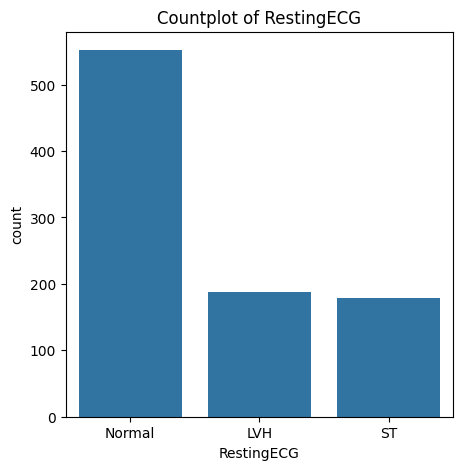

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x="RestingECG", order=data["RestingECG"].value_counts().index)
plt.xticks(rotation=360)
plt.title("Countplot of RestingECG")
plt.show()

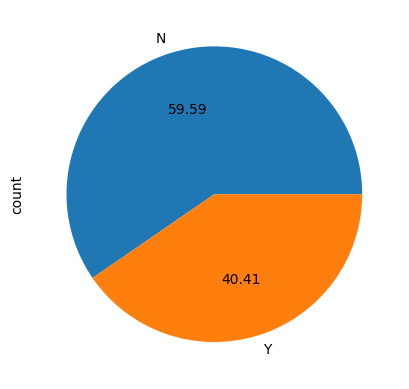

In [38]:
data["ExerciseAngina"].value_counts().plot(kind="pie", autopct = "%.2f")
plt.show()

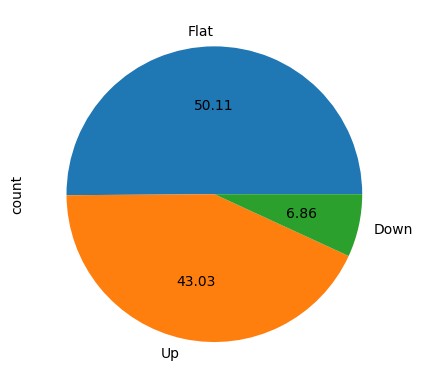

In [39]:
data["ST_Slope"].value_counts().plot(kind="pie", autopct = "%.2f")
plt.show()

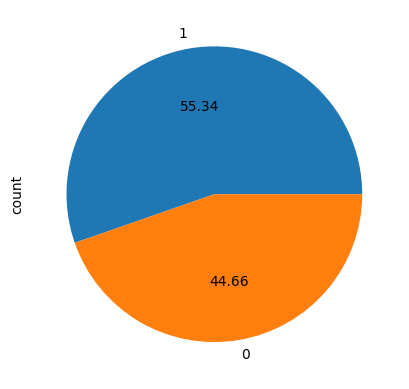

In [40]:
data["HeartDisease"].value_counts().plot(kind="pie", autopct = "%.2f")
plt.show()

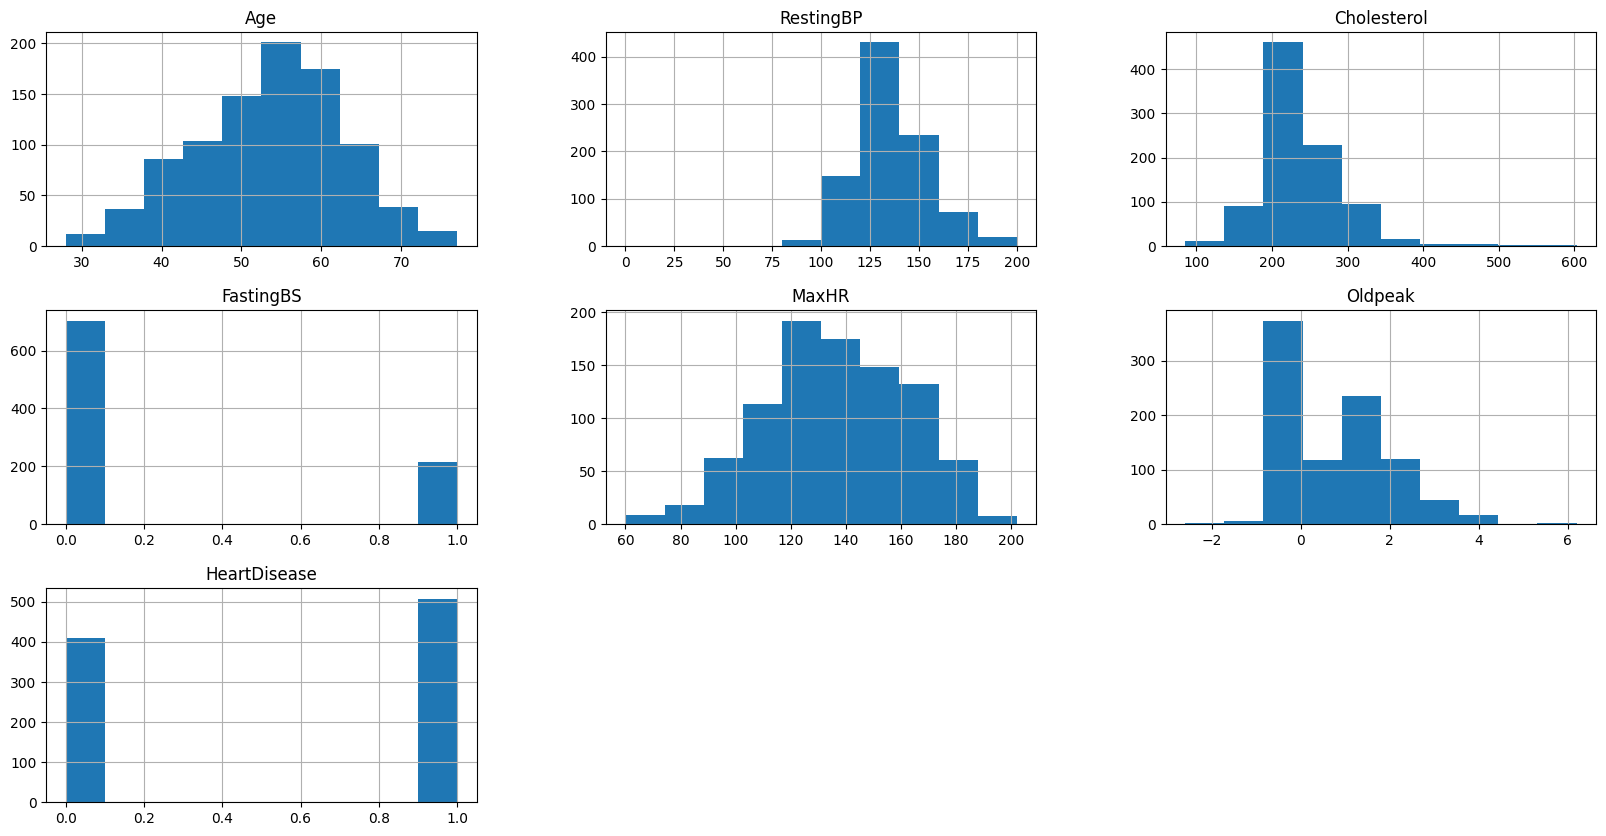

In [41]:
data.hist(figsize=(20,10))
plt.show()

<Axes: ylabel='RestingBP'>

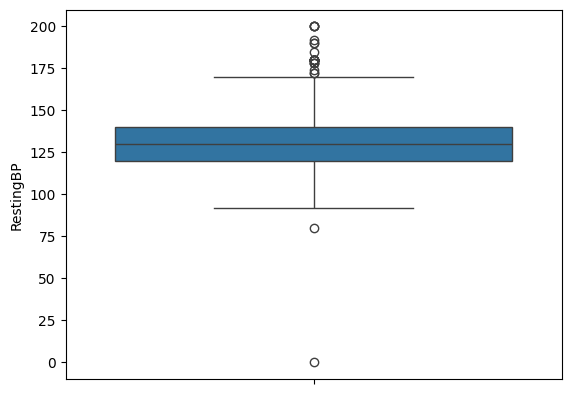

In [42]:
sns.boxplot(data["RestingBP"])

<Axes: >

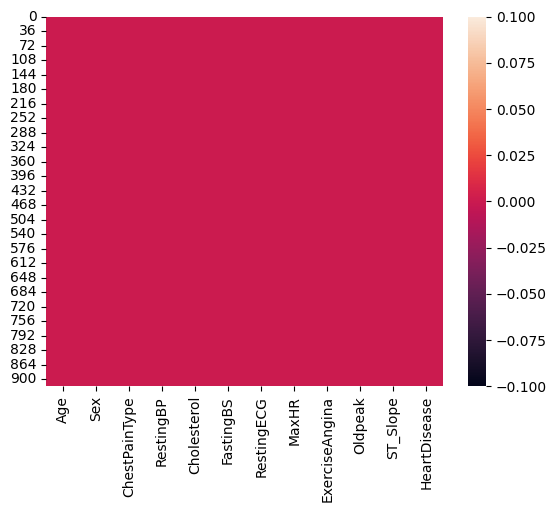

In [43]:
sns.heatmap(data.isnull())

<Axes: xlabel='Age', ylabel='Count'>

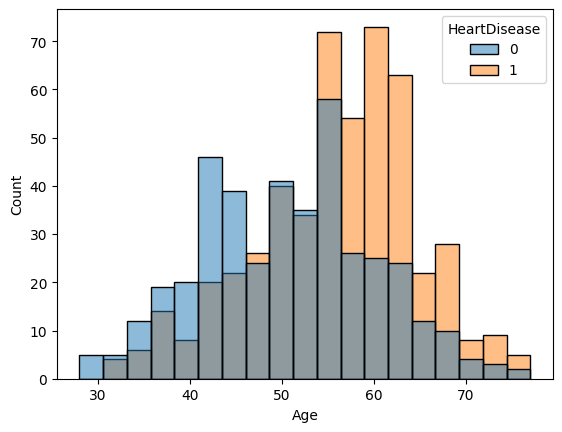

In [44]:
sns.histplot(data = data ,x = 'Age', hue = 'HeartDisease')

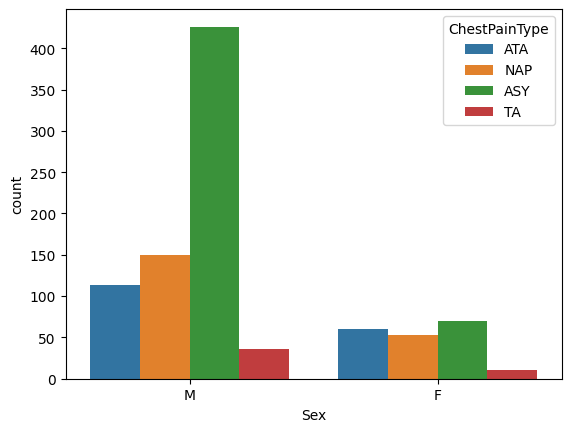

In [45]:
plt.xticks(rotation=360)
sns.countplot(data = data , x = "Sex" , hue = "ChestPainType")
plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

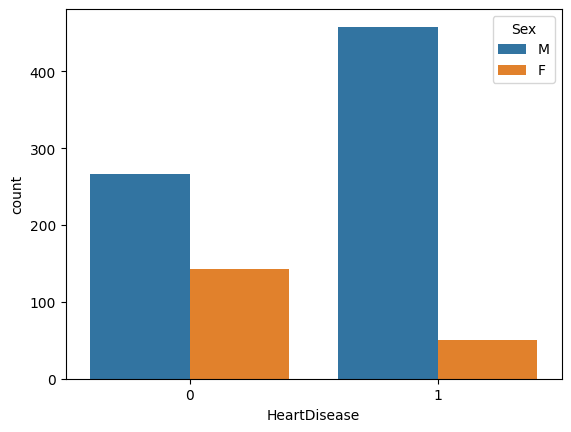

In [46]:
plt.xticks(rotation=360)
sns.countplot(data = data , x  ="HeartDisease" , hue = "Sex")

<Axes: ylabel='HeartDisease'>

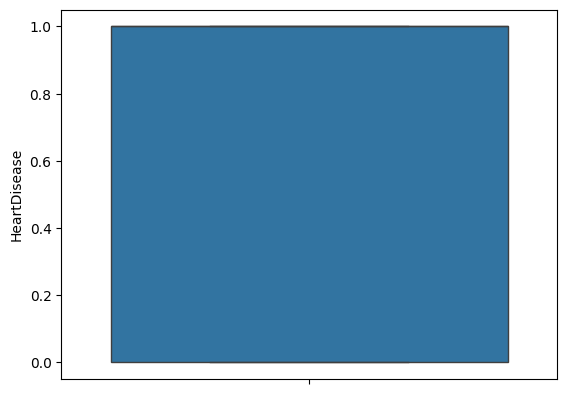

In [47]:
sns.boxplot(data["HeartDisease"])

In [48]:
correlation = data.corr()
sns.heatmap(correlation, annot= True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

ValueError: could not convert string to float: 'M'

[]

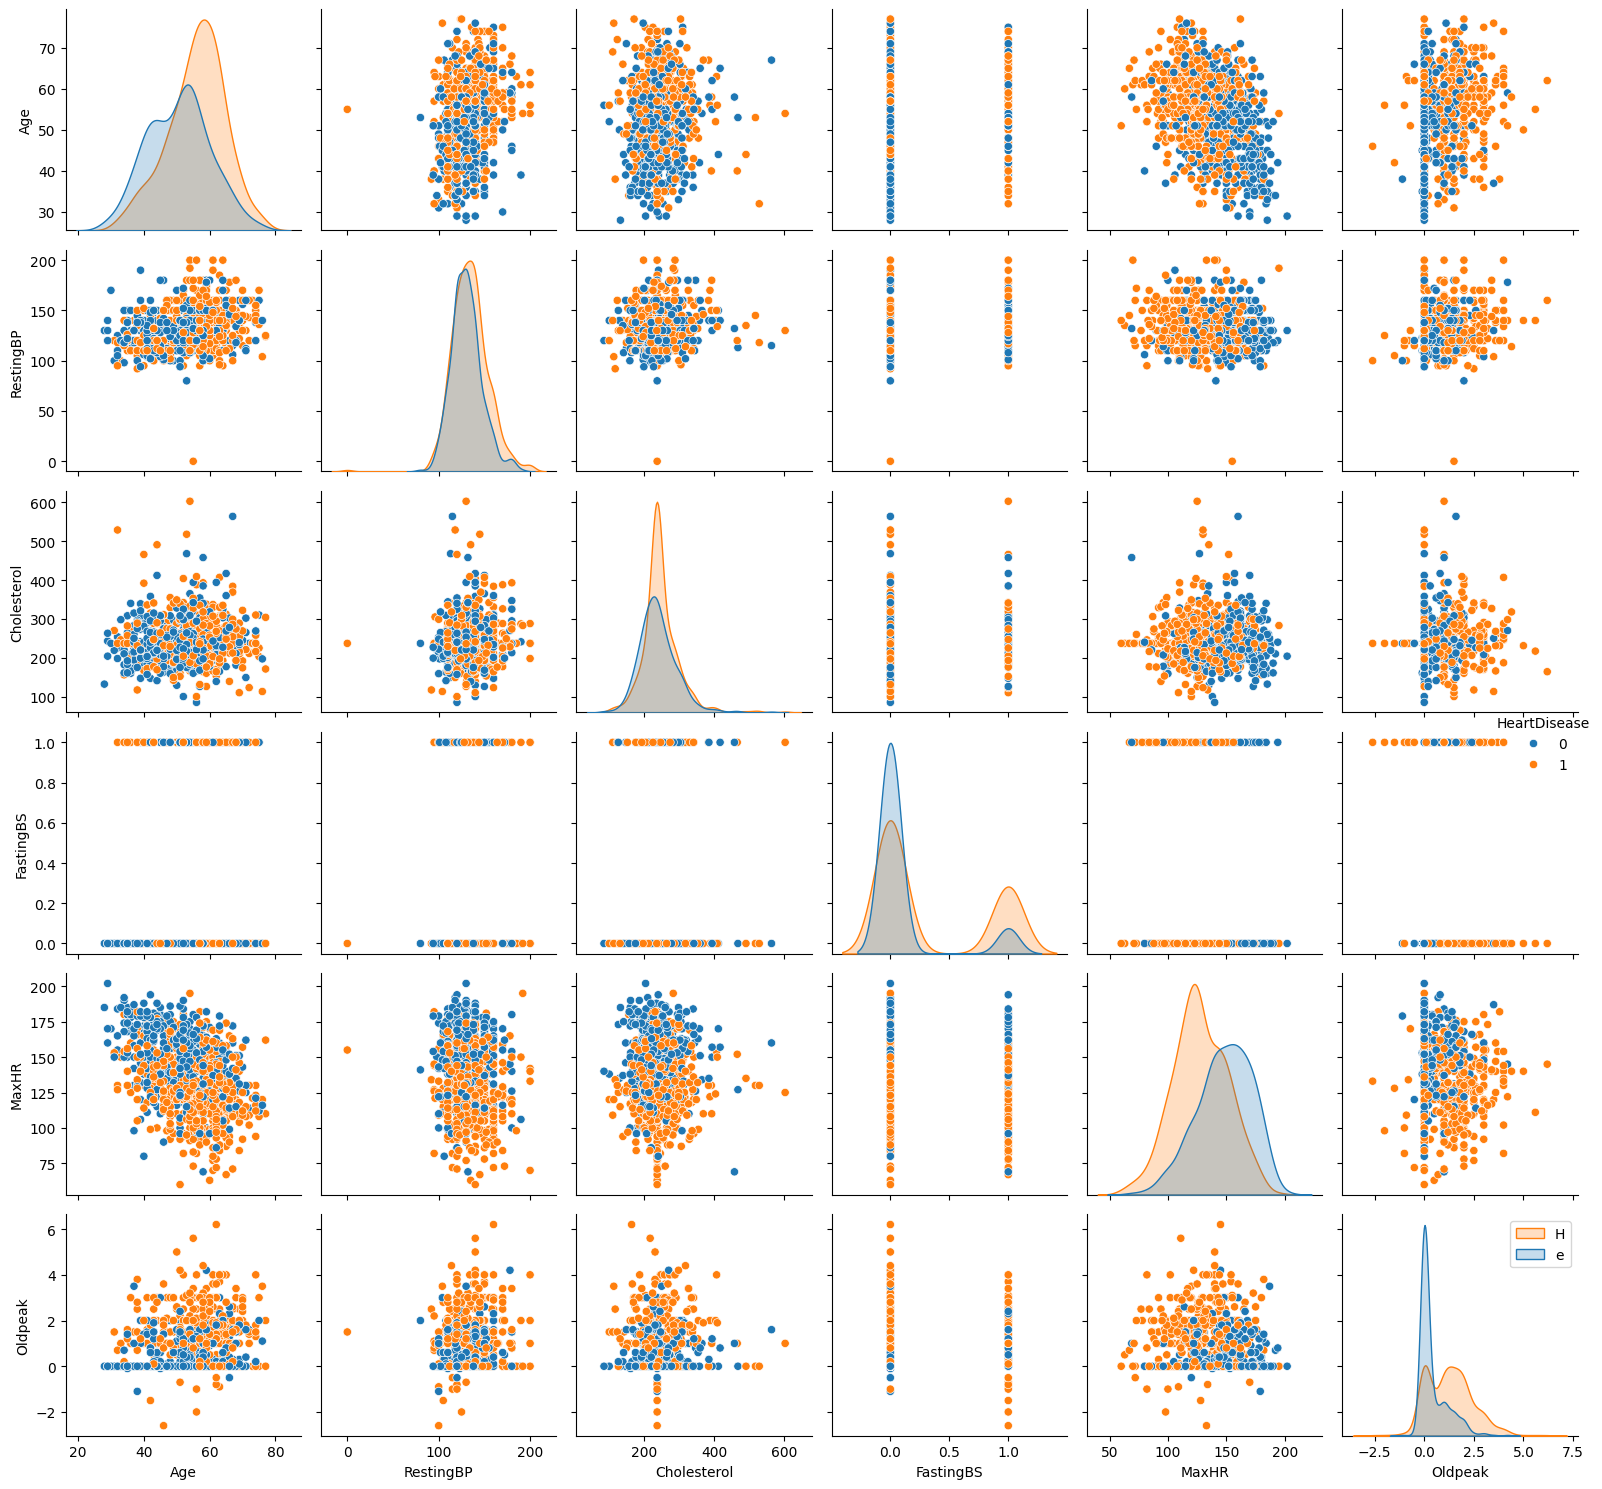

In [49]:
sns.pairplot(data,hue="HeartDisease")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

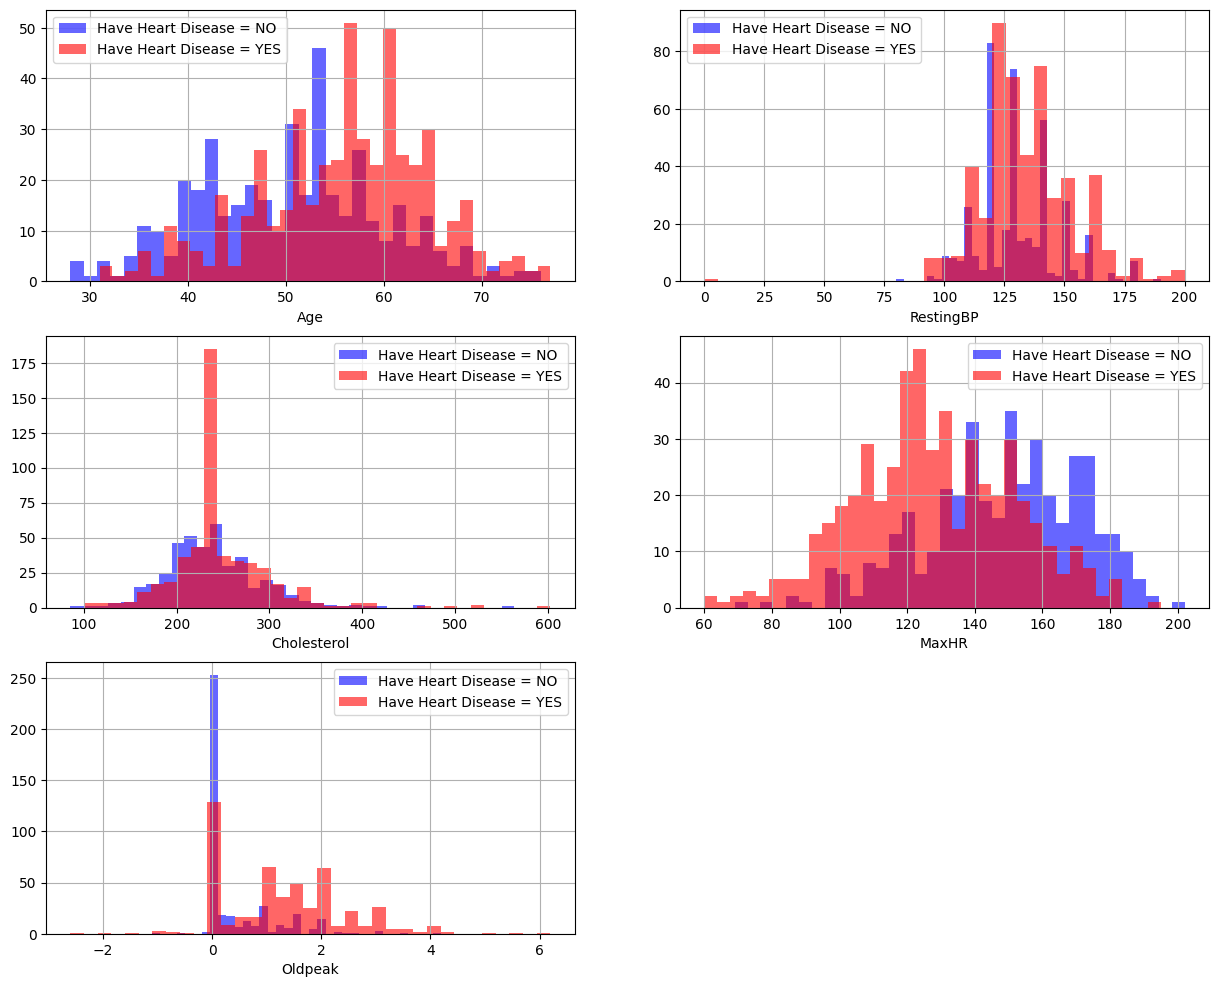

In [50]:
plt.figure(figsize=(15,12))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


In [51]:
import pandas as pd
import folium
import json

# تحميل البيانات من ملف CSV
df = pd.read_csv('heart-disease-rates-by-country-2024.csv')

# تحميل ملف GeoJSON للحدود الجغرافية
geojson_path = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

#with open('countries.geojson') as f:
    #geojson_data = json.load(f)

# إيجاد الدولة التي تحتوي على أكبر عدد من مرضى القلب
max_patients = df['HeartDiseaseRates_AllAgesTotalDeaths_2021'].max()
max_country = df[df['HeartDiseaseRates_AllAgesTotalDeaths_2021'] == max_patients]['country'].values[0]

# إنشاء خريطة مع المركز الافتراضي
map = folium.Map(location=[20, 0], zoom_start=2)

# إضافة حدود الدول إلى الخريطة، وتظليل الدولة التي تحتوي على أكبر عدد من المرضى
folium.Choropleth(
    geo_data=geojson_path,
    data=df,
    columns=['country', 'HeartDiseaseRates_AllAgesTotalDeaths_2021'],
    key_on='feature.properties.name',  # هذه الخاصية تعتمد على هيكل GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heart Disease Patients by Country'
).add_to(map)



# حفظ الخريطة في ملف HTML
map.save('heart_disease_map.html')

# عرض اسم الدولة التي تحتوي على أكبر عدد من المرضى
print(f"The country with the most heart disease patients is {max_country} with {max_patients} patients.")
map

The country with the most heart disease patients is China with 5560000 patients.


### Processing Data

In [52]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [53]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')

In [54]:
obj["Sex"] = lab.fit_transform(obj["Sex"])
obj["ChestPainType"] = lab.fit_transform(obj["ChestPainType"])
obj["RestingECG"] = lab.fit_transform(obj["RestingECG"])
obj["ExerciseAngina"] = lab.fit_transform(obj["ExerciseAngina"])
obj["ST_Slope"] = lab.fit_transform(obj["ST_Slope"])

In [55]:
df=pd.concat([obj,non_obj],axis=1)

In [56]:
!pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 108.9 kB/s 


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [61]:
from collections import Counter

In [62]:
print('Old data set shape{}'.format(Counter(y)))
print('New data set shape{}'.format(Counter(y_res)))

Old data set shapeCounter({1: 508, 0: 410})
New data set shapeCounter({0: 508, 1: 508})


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [64]:
x_train.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
759,1,1,0,0,2,54,192,283.0,0,195,0.0
677,1,2,1,0,2,44,120,226.0,0,169,0.0
699,1,0,1,1,1,57,110,201.0,0,126,1.5
519,1,0,2,1,2,63,96,305.0,0,121,1.0
673,0,0,1,1,1,59,174,249.0,0,143,0.0


In [65]:
y_train.head()

759    1
677    0
699    0
519    1
673    1
Name: HeartDisease, dtype: int64

In [66]:
columns=['KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [67]:
model = RandomForestClassifier()

In [68]:
model.fit(X= x_train, y= y_train)

RandomForestClassifier()

In [69]:
import pickle

In [70]:
pickle.dump(model, open('3bdo_Random_forest_model.pkl', 'wb'))

In [71]:
def all(model):
    model.fit(x_train,y_train)
    model.predict(x_test)
    pre=model.predict(x_test)
    
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1= f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

    print(confusion_matrix(pre,y_test))
    print(classification_report(pre,y_test))

In [72]:
model1=KNeighborsClassifier()
all(model1)

[[49 33]
 [27 75]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        82
           1       0.69      0.74      0.71       102

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184



In [73]:
model2=DecisionTreeClassifier()
all(model2)

[[60 19]
 [16 89]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        79
           1       0.82      0.85      0.84       105

    accuracy                           0.81       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



In [74]:
model3=GaussianNB()
all(model3)

[[66 14]
 [10 94]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.87      0.90      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



In [75]:
model4=SVC()
all(model4)

[[46 19]
 [30 89]]
              precision    recall  f1-score   support

           0       0.61      0.71      0.65        65
           1       0.82      0.75      0.78       119

    accuracy                           0.73       184
   macro avg       0.71      0.73      0.72       184
weighted avg       0.75      0.73      0.74       184



In [76]:
model5=RandomForestClassifier(n_estimators=1000,class_weight='balanced')
all(model5)

[[ 62   5]
 [ 14 103]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        67
           1       0.95      0.88      0.92       117

    accuracy                           0.90       184
   macro avg       0.88      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



In [77]:
model6= GradientBoostingClassifier(n_estimators=1000)
all(model6)

[[ 62   7]
 [ 14 101]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        69
           1       0.94      0.88      0.91       115

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [78]:
result1

[0.6739130434782609,
 0.8097826086956522,
 0.8695652173913043,
 0.7336956521739131,
 0.8967391304347826,
 0.8858695652173914]

In [79]:
result2

[np.float64(0.7352941176470589),
 np.float64(0.8476190476190476),
 np.float64(0.9038461538461539),
 np.float64(0.7478991596638656),
 np.float64(0.8803418803418803),
 np.float64(0.8782608695652174)]

In [80]:
result3

[np.float64(0.7142857142857143),
 np.float64(0.8356807511737089),
 np.float64(0.8867924528301887),
 np.float64(0.7841409691629956),
 np.float64(0.9155555555555556),
 np.float64(0.905829596412556)]

In [81]:
FinalResult=pd.DataFrame({'Algorithm':columns,'Accuracies':result2 ,'FScore':result3})

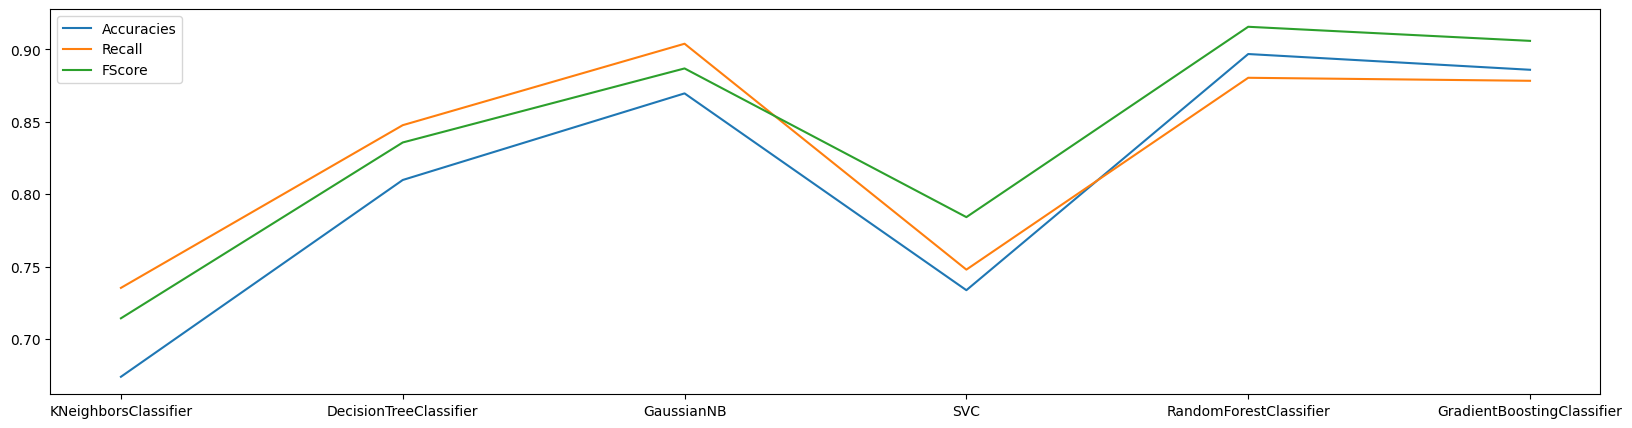

In [82]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result1,label='Accuracies')
plt.plot(FinalResult.Algorithm,result2,label='Recall')
plt.plot(FinalResult.Algorithm,result3,label='FScore')
plt.legend()
plt.show()

In [83]:
import pickle
pickle.dump(RandomForestClassifier, open('Random_forest_model.pkl', 'wb'))